In [ ]:
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('D:\python practice/Data Analytics/Real Dataset Practice/Spotify customers/spotify-2023.csv',encoding='latin1')

In [2]:
df_t = df.copy()
df_t

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [3]:
df_t = df_t.dropna(subset=['released_year','released_month','released_day'])

In [4]:
#converting released years to integer datatype
df_t['released_year'] = df_t['released_year'].astype(int)
df_t['released_month'] = df_t['released_month'].astype(int)
df_t['released_day'] = df_t['released_day'].astype(int)


In [5]:
print(df_t[['released_year', 'released_month', 'released_day']].head())

   released_year  released_month  released_day
0           2023               7            14
1           2023               3            23
2           2023               6            30
3           2019               8            23
4           2023               5            18


In [6]:
df_t['release_date'] = pd.to_datetime({
    'year': df_t['released_year'],
    'month': df_t['released_month'],
    'day': df_t['released_day']
})

In [7]:
df_t['month'] = df_t['release_date'].dt.to_period('M')
df_t = df_t[df_t['release_date'].dt.year == 2023]  # Filter to just year 2023

In [8]:
monthly_summary = df_t.groupby('month').agg({
    'artist(s)_name': pd.Series.nunique,
    'track_name' : 'count'
}).rename(columns={
    'artist(s)_name': 'Unique Artists',
    'track_name': 'Songs Added'
}).reset_index()

In [9]:
monthly_summary.columns = ['Month', 'Unique Artists', 'Songs Added']    
monthly_summary['Month'] = monthly_summary['Month'].astype(str)

In [10]:
monthly_melted = monthly_summary.melt(id_vars='Month', var_name='Metric', value_name='Count')

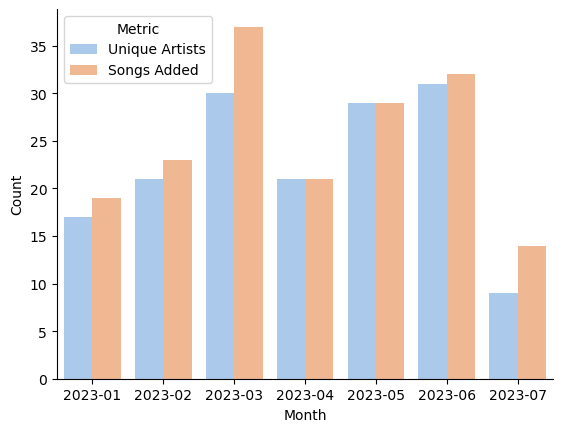

In [18]:
sns.barplot(data=monthly_melted, x='Month', y='Count', hue='Metric',palette='pastel')
sns.despine()